<a href="https://colab.research.google.com/github/LuisAdorno/coding-journey/blob/main/MVP_Luis_Assumpcao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Luís Eduardo Assumpção

# 1. Definição do Problema

Neste Projeto usarei o dataset Car Sales, adquirido no Kaggle. O problema, ou objetivo desse dataset, é entender se há como prever o percentual de desvalorização de certos carros baseados em determinados atributos. Os dados sao restritos a veículos ano 2011/12 do mercado americano. Há diversos atributos, assim como uma variável de classe binaria 0 ou 1 que identifica modelos de carro com depreciação de mais de 30% (0) ou menos de 30% (1) após um ano. Seria considerado um problema de aprendizado supervisionado, já que os dados inseridos são rotulados. Uma hipótese seria que bons preços de revendas podem tender a certas marcas.



**Informações sobre os atributos:**



*   **Manufacturer:** Fabricante;
*   **Model:** Modelo do carro; 
*   **Sales_in_thousands:** Vendas(milhares); 
*   **Year_resale_value:** Valor de revenda após um ano;
*   **Vehicle_type:** Tipo de veículo (passageiro, suv/minivan/caminhonete); 
*   **Price_in_thousands:** Preço (milhares de dólares); 
*   **Engine_size:** Tamanho do motor; 
*   **Horsepower:** Potência em cavalos;
*   **Fuel_capacity:** Capacidade de combustível;
*   **Fuel_efficiency:** Economia de combustível; 
*   **Depreciation:** Depreciação (%);
*   **Good resale?:** Boa revenda? (1 sim, 0 não)






 

  
 
 

 
 
 
 

In [54]:
#Impedir warnings
import warnings
warnings.filterwarnings('ignore')

# Import librariws 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Carregando os dados:

In [55]:
#URL do Dataset Car Salrs
url = "https://raw.githubusercontent.com/LuisAdorno/coding-journey/main/car_sales_edited2.csv"

#Lendo o arquivo usando pandas
dataset = pd.read_csv(url, delimiter=',')

In [56]:
#Conferindo o carregamento
dataset.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Fuel_capacity,Fuel_efficiency,Depreciation,Good resale?
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,13.2,28.0,-24%,1.0
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,17.2,25.0,-30%,0.0
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225,17.2,26.0,NaN,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,18.0,22.0,-29%,1.0
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,16.4,27.0,-7%,1.0


# 2. Análise exploratória 

### Primeiro conferir a dimensão e algumas informações gerais do dataset

In [57]:
#Dimensão
dataset.shape 

(156, 12)

In [58]:
#Informações gerais
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         156 non-null    object 
 1   Model                156 non-null    object 
 2   Sales_in_thousands   156 non-null    float64
 3   __year_resale_value  120 non-null    float64
 4   Vehicle_type         156 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    int64  
 8   Fuel_capacity        156 non-null    float64
 9   Fuel_efficiency      154 non-null    float64
 10  Depreciation         125 non-null    object 
 11  Good resale?         142 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 14.8+ KB


In [59]:
#Conferindo o início do dataset (primeiros 5)
dataset.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Fuel_capacity,Fuel_efficiency,Depreciation,Good resale?
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,13.2,28.0,-24%,1.0
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,17.2,25.0,-30%,0.0
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225,17.2,26.0,NaN,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,18.0,22.0,-29%,1.0
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,16.4,27.0,-7%,1.0


In [60]:
#Conferindo o final do dataset, últimos 5
dataset.tail(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Fuel_capacity,Fuel_efficiency,Depreciation,Good resale?
151,Volvo,V40,3.545,NaN,Passenger,24.4,1.9,160,15.8,25.0,NaN,NaN
152,Volvo,S70,15.245,NaN,Passenger,27.5,2.4,168,17.9,25.0,NaN,NaN
153,Volvo,V70,17.531,NaN,Passenger,28.8,2.4,168,17.9,25.0,NaN,NaN
154,Volvo,C70,3.493,NaN,Passenger,45.5,2.3,236,18.5,23.0,NaN,NaN
155,Volvo,S80,18.969,NaN,Passenger,36.0,2.9,201,21.1,24.0,NaN,NaN


In [61]:
#Tipo de dataset, caso necessite fazer conversões 
dataset.dtypes

Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower               int64
Fuel_capacity          float64
Fuel_efficiency        float64
Depreciation            object
Good resale?           float64
dtype: object

In [62]:
#Resumo estatístico que identifica a média, o desvio padrão, o mínimo, o máximo e os quartis)
dataset.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_capacity,Fuel_efficiency,Good resale?
count,156.000000,120.000000,155.000000,156.000000,156.000000,156.000000,154.000000,142.000000
mean,52.994987,18.060750,27.390755,3.060897,185.948718,17.951923,23.844156,0.429577
std,68.248508,11.500614,14.351653,1.044653,56.700321,3.887921,4.282706,0.496768
min,0.110000,5.160000,9.235000,1.000000,55.000000,10.300000,15.000000,0.000000
25%,14.035000,11.255000,18.017500,2.300000,149.500000,15.800000,21.000000,0.000000
50%,29.213000,14.095000,22.799000,3.000000,177.500000,17.200000,24.000000,0.000000
75%,68.069750,19.878750,31.947500,3.575000,215.000000,19.575000,26.000000,1.000000
max,540.561000,67.550000,85.500000,8.000000,450.000000,32.000000,45.000000,1.000000


### **Observação:** É possível identificar que um dos atributos mais importantes, o valor de revenda dos veículos, contém apenas 120 entradas (__year_resale_value), sendo que há 156 modelos. Isso já é indicativo de missings e é a coluna mais expressiva nesse sentido. 

In [63]:
#Distribuição das classes (bom e ruim valor de revenda)
dataset.groupby('Good resale?').size()

Good resale?
0.0    81
1.0    61
dtype: int64

In [64]:
#Correlação de Pearson
dataset.corr(method='pearson')

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_capacity,Fuel_efficiency,Good resale?
Sales_in_thousands,1.000000,-0.278984,-0.304734,0.019983,-0.197756,0.086540,-0.016764,-0.137962
__year_resale_value,-0.278984,1.000000,0.953840,0.531330,0.769081,0.325567,-0.399880,0.402118
Price_in_thousands,-0.304734,0.953840,1.000000,0.626875,0.839744,0.423282,-0.492157,0.221962
Engine_size,0.019983,0.531330,0.626875,1.000000,0.837360,0.663022,-0.734622,-0.096636
Horsepower,-0.197756,0.769081,0.839744,0.837360,1.000000,0.499907,-0.611332,0.060356
Fuel_capacity,0.086540,0.325567,0.423282,0.663022,0.499907,1.000000,-0.801512,0.007247
Fuel_efficiency,-0.016764,-0.399880,-0.492157,-0.734622,-0.611332,-0.801512,1.000000,0.019792
Good resale?,-0.137962,0.402118,0.221962,-0.096636,0.060356,0.007247,0.019792,1.000000


### **Observação:** Com a correlação de Pearson, já podemos começar a visualizar a relação que diversos atributos tem com o valor binário de "Good resale?" Entre os de destaque estariam "Fuel efficiency", "Horsepower" e "Price_in_Thousands".

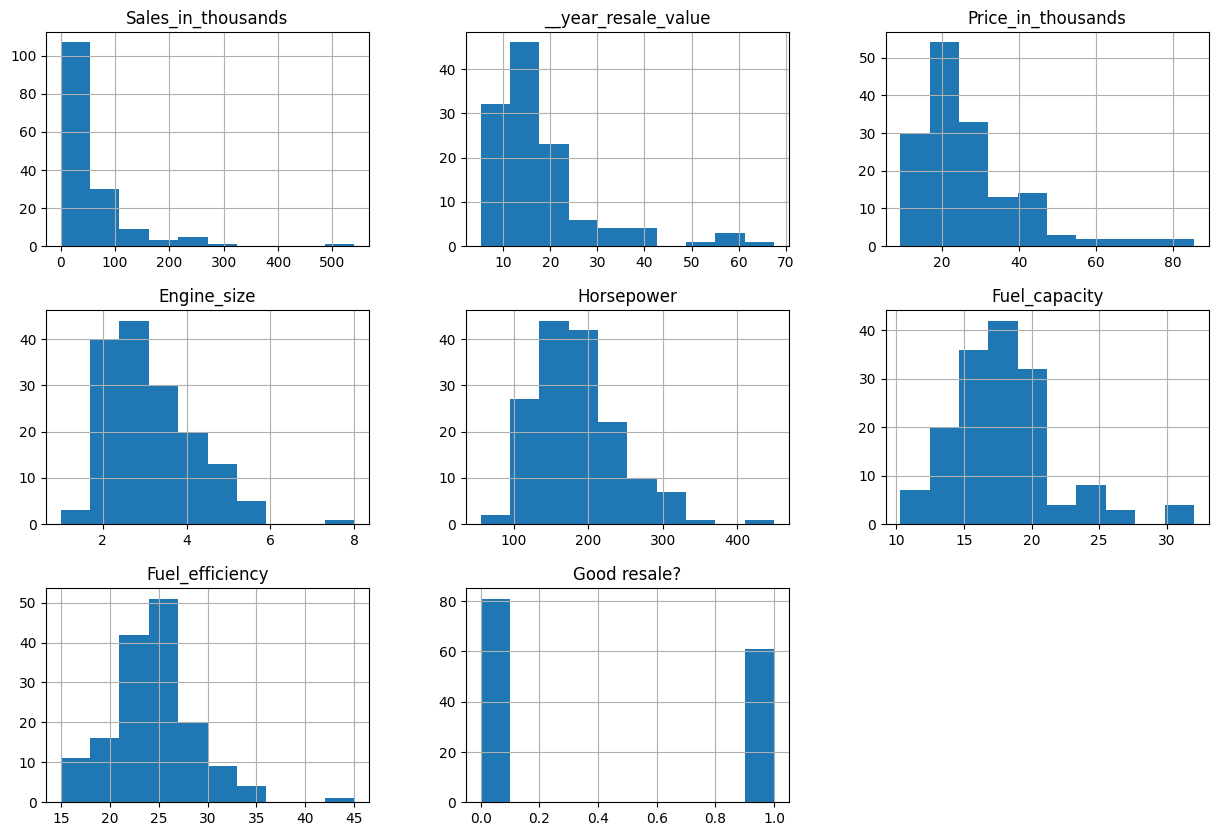

In [65]:
#Histograma 
dataset.hist(figsize = (15,10))
plt.show()

### **Observação:** Os histogramas nos mostra uma certa assimetria para a direita de quase todos os gráficos. O "sales in thousands" demonstra uma certa relação de exponenciabilidade. Os atributos de apresentam unimodalidade, porém com clara presença de outliers entre eles. Muitos dos dados se mostram concentrados em poucos intervalos. 

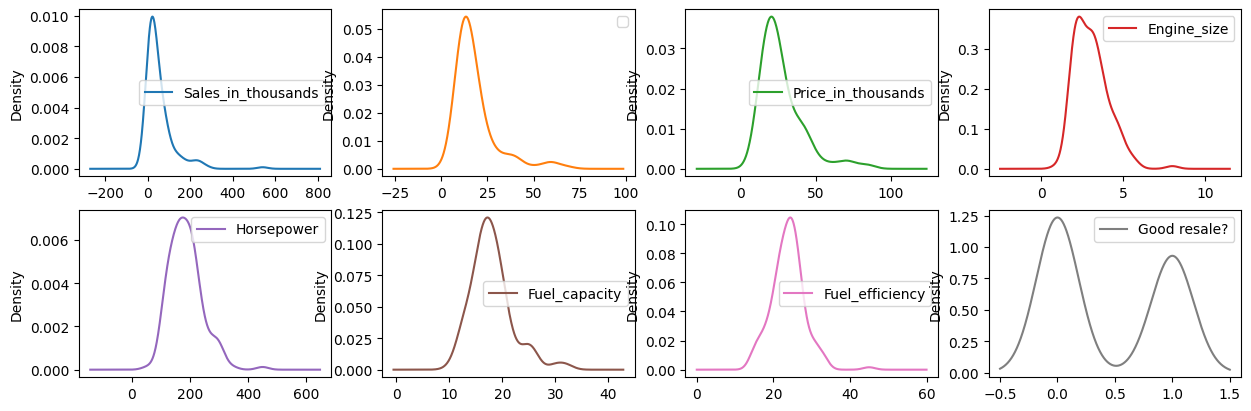

In [66]:
#Density plot
dataset.plot(kind = 'density', subplots = True, layout = (4,4), sharex = False, figsize = (15,10))
plt.show()

### **Observação:** O gráfico de densidade confirma a concentração em que os dados se encontram, sinalizando melhor uma assimetria para a esquerda na maioria dos atributos. O atributo de 'Good resale?' é naturalmente bimodal por se tratar de dados binários, mas mostra evidência que a maioria dos modelos de carro não se enquadram em desvalorizar menos que 30% no período de um ano. 

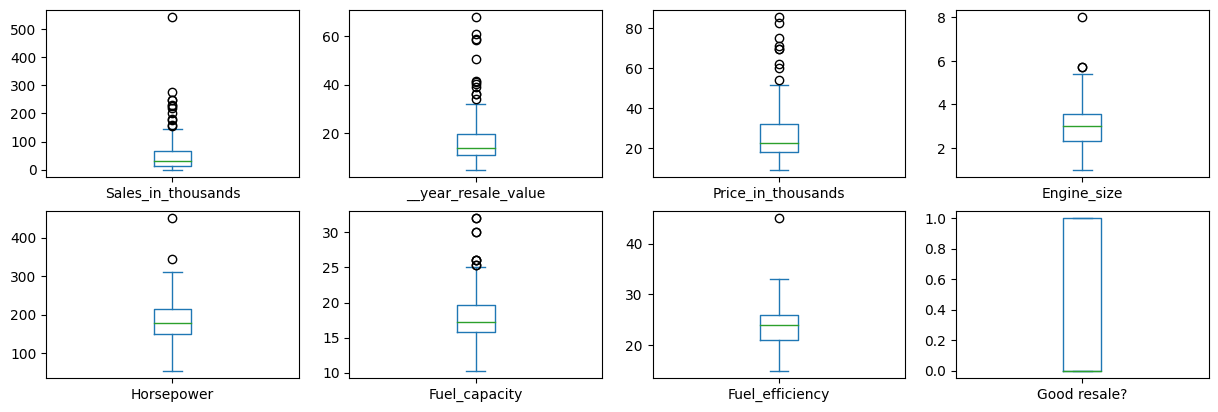

In [67]:
#Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### **Observação: **: O scatterplot nos dá uma visualização melhor dos outliers que apareciam nos histogramas e density plots. As maiores ocorrências de outliers ocorrem nos atributos com valores maiores, como 'Sales_in_thousands', '__year_resale_value', e 'Price_in_thousands'. Os outros valores têm diferenças muito menores entre os máximos e mínimos, o que demonstra que são dados mais equilibrados entre os modelos. É necessario entender se esses outliers tem um grande impacto a avaliação de depreciação boa ou ruim, ou se simplesmente fazem parte numa database com diversos modelos de carros e fabricantes diferentes.

<Axes: >

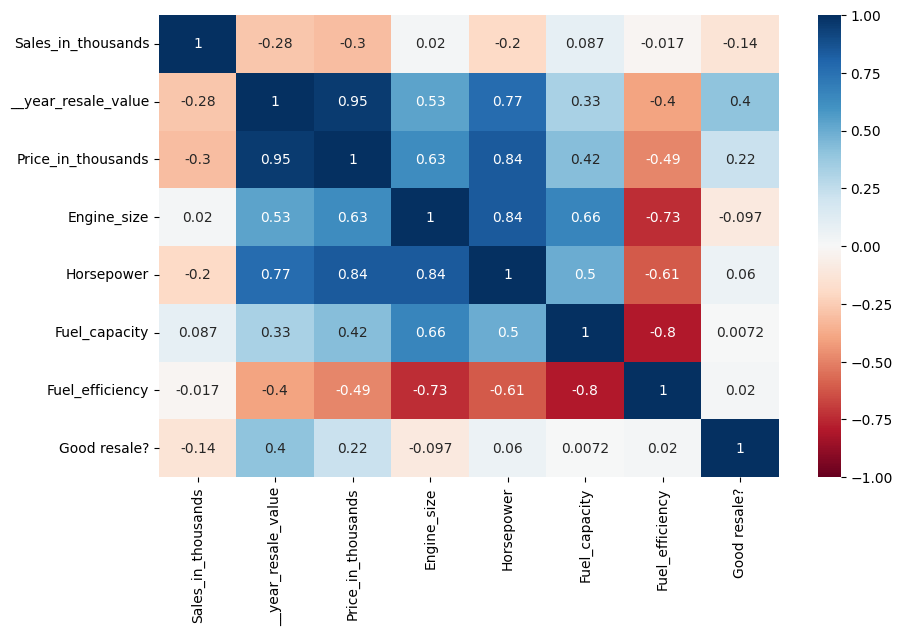

In [68]:
#Matriz de Correlação com Seaborn
plt.figure(figsize =(10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

### **Observação:** A matriz de correlação da Seaborn nos dá a melhor noção até agora do relacionamento entre os atributos. Olhando diretamente para "Good resale?", podemos indentificar com maior clareza o que impacta nesse restuldado e o que não influencia tanto. O 'Sale_in_thousands' e 'Engine_size' em vermelho ja nos indicam que a quantidade de unidade vendidas e o tamanho do motor são os fatores que menos influenciam na depreciação de um veículo. A matriz mostra que além do fator de preço de revenda (__year_resale_value) influenciar bem na avaliação, o preço de venda carro também parece ser uma boa base para saber se o carro terá um bom preço de revenda no futuro. 

# 3. Pré-Processamento

### Tratando os Missings

In [80]:
# Verificando os nulls no dataset
dataset.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      1
Engine_size             0
Horsepower              0
Fuel_capacity           0
Fuel_efficiency         2
Depreciation           31
Good resale?           14
dtype: int64

### **Observação:** Muitos desses dados faltantes haviam sido identificados na matriz de Pearson, mas agora temos uma clareza maior de onde se encontram.

<Axes: >

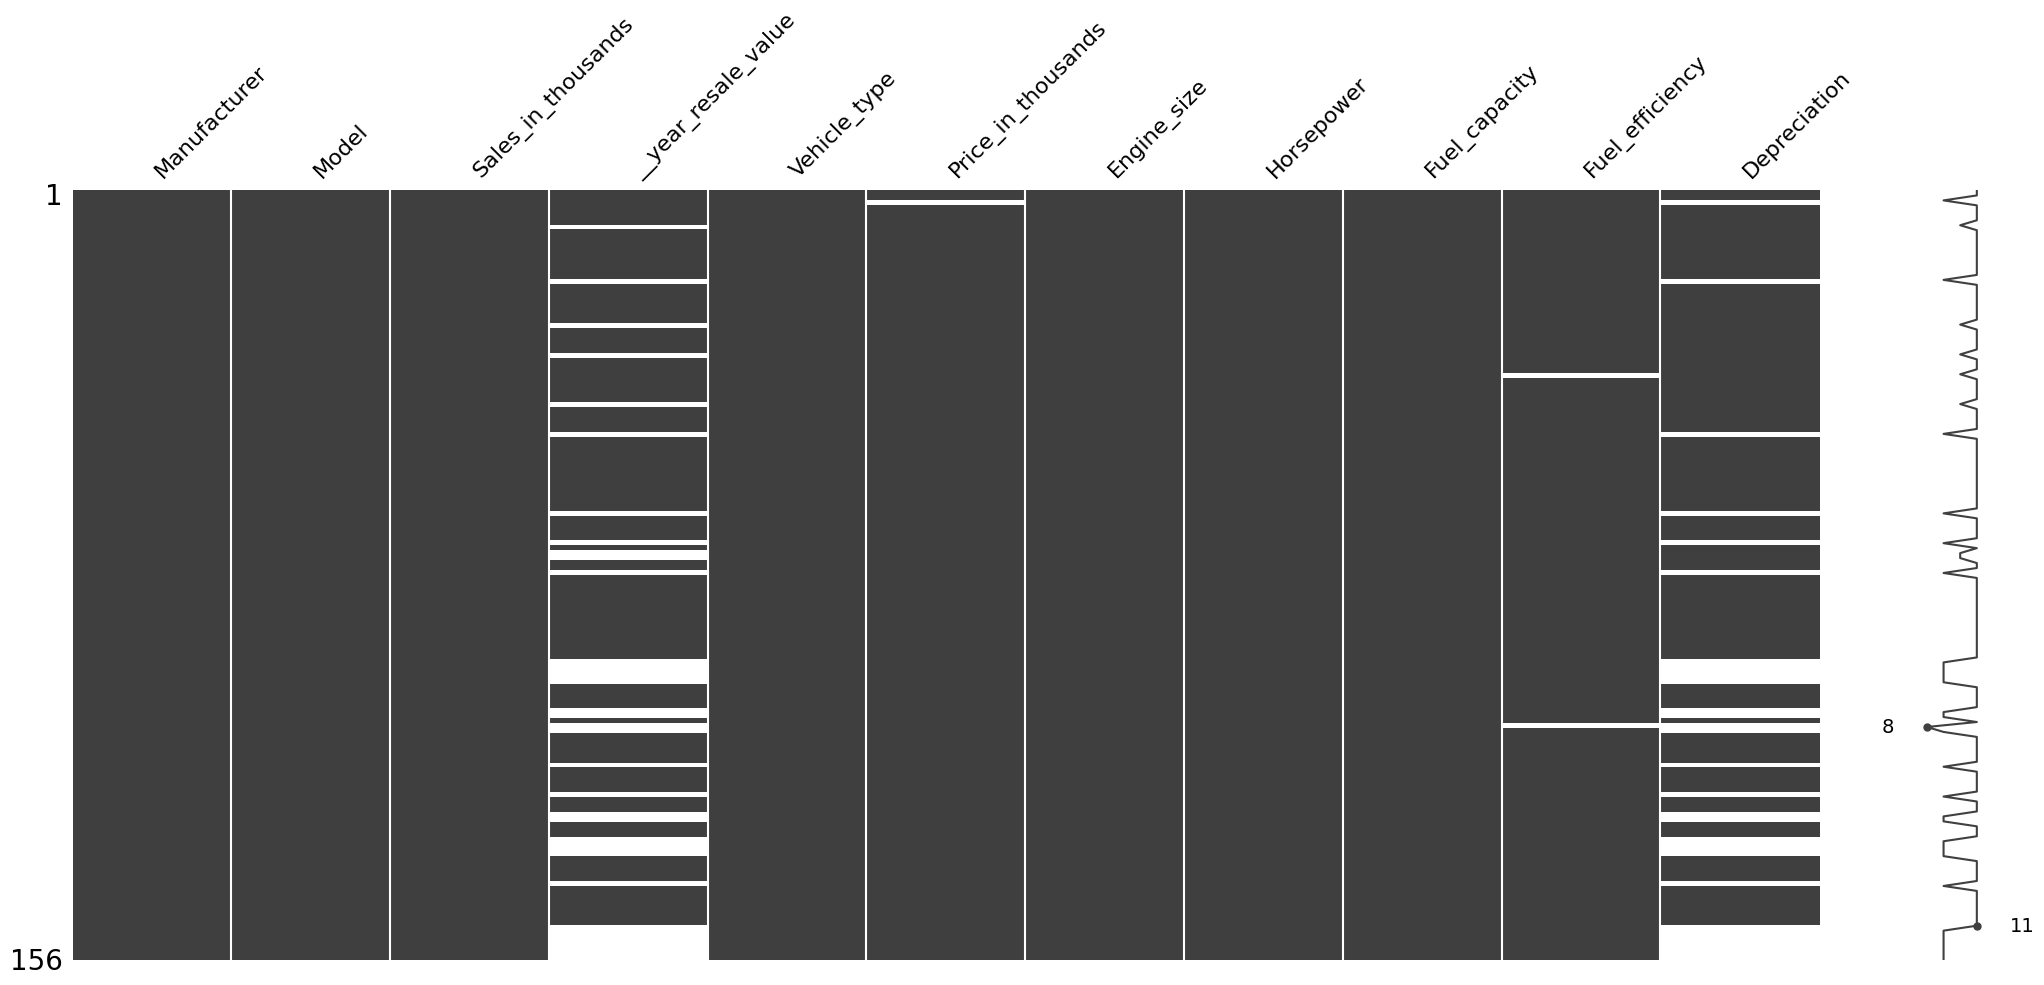

In [84]:
# Tratando o dataset
# Nomes das colunas
col = list(dataset.columns)

# Excluindo a coluna de classe "Good resale?"
atributos = dataset[col[0:-1]]

# Trocando os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# Matriz de nulidade
ms.matrix(atributos)
     

**Obsevação:** Como havíamos observado no resumo estatístico, existem vários dados faltantes em colunas importantes. Vamos então, como será feito a seguir. A coluna de depreciação (Depreciation) avalia todos os carros por terem uma de preciação acima ou abaixo de 30% no primeiro ano. Como trocar pela mediana da coluna poderia distorçer muito os resultados, ja que modelos de carros podem se diferenciar muito entre si, decidi por dar o valor padrão de 0.31. Isso significa que todos esses com dados faltantes serão considerados com depreciação acima de 30%, logo entrariam com a maioria para a classe 0 de "Good resale?" e não influenciariam o resuldado dos carros que temos as informações e de fato sao considerados com bom valor de revenda. 

Já o '__year_resale_value', 'Price_in_thousands', e 'Fuel_efficiency' iremos substituir pela mediana. 

<Axes: >

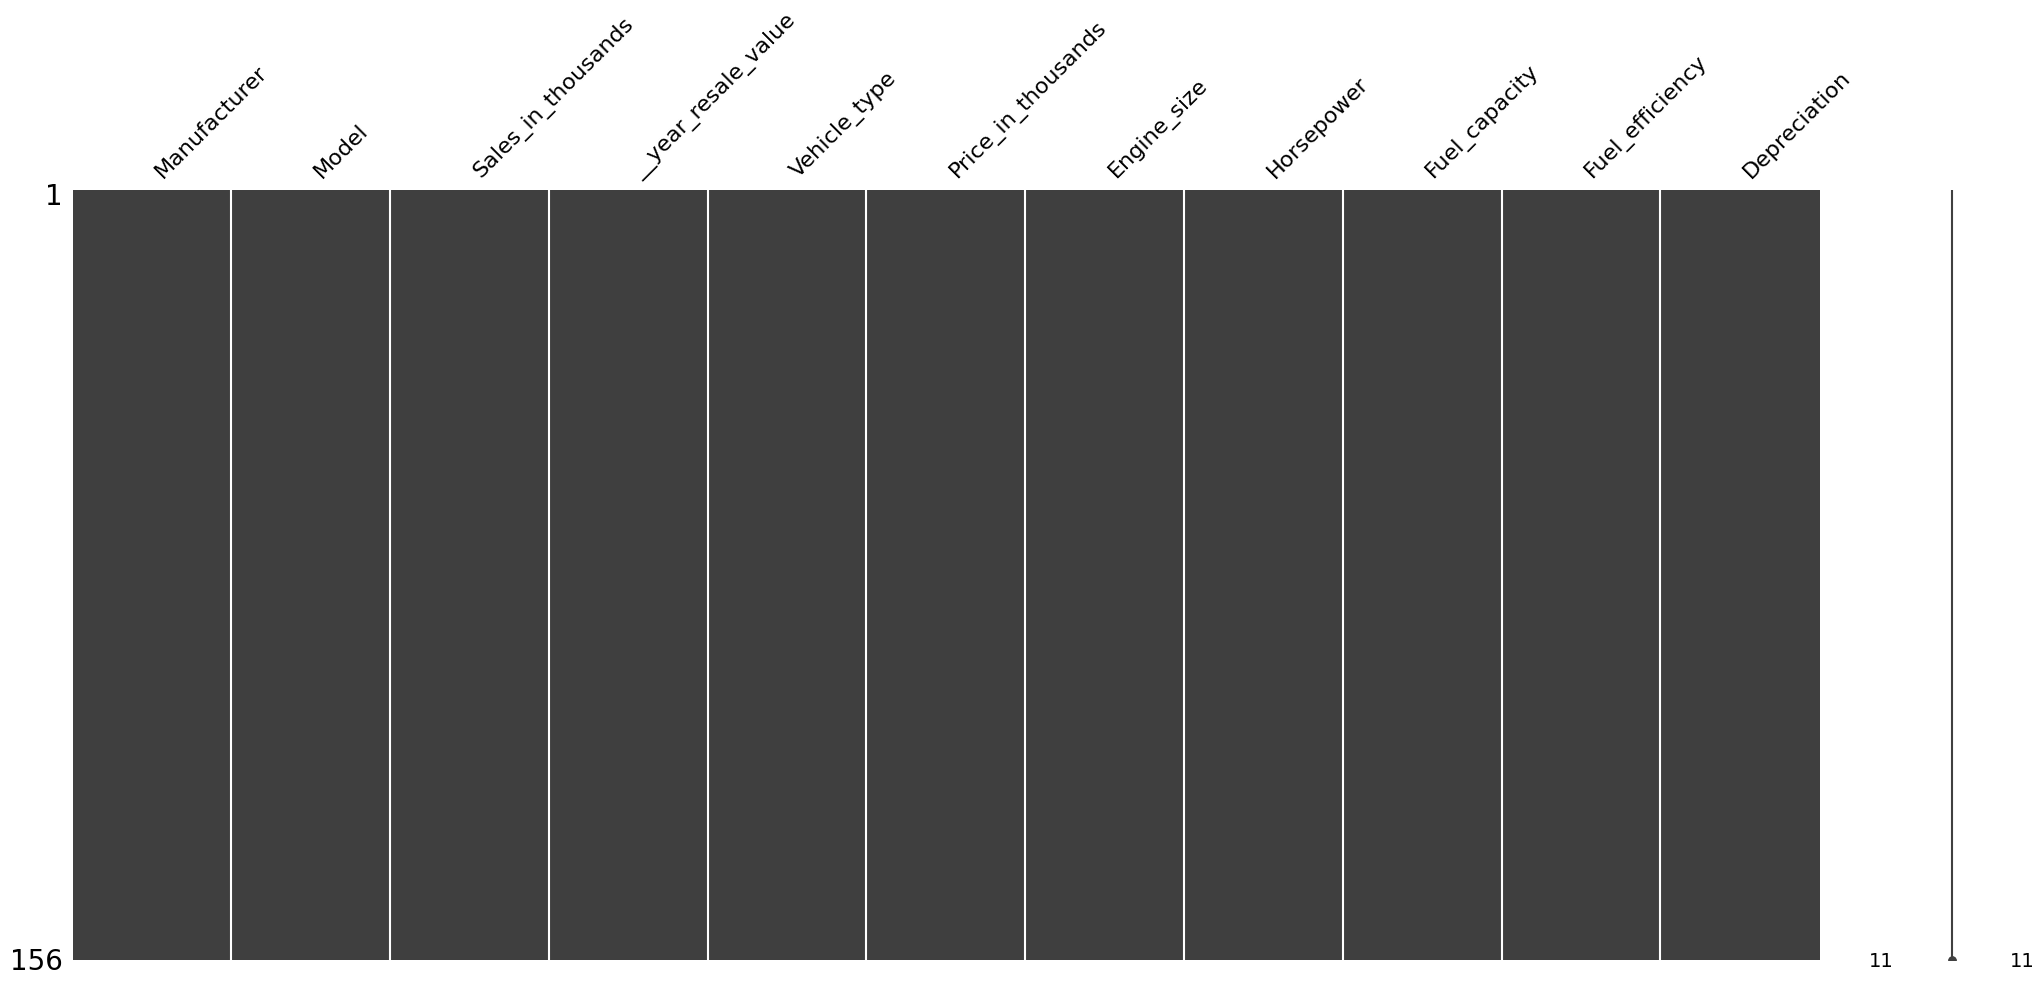

In [72]:

# substituindo os NaN de 'Depreciation' por 0.31
atributos['Depreciation'].fillna(0.31, inplace=True)

# substituindo os NaN de '__year_resale_value', 'Price_in_thousands','Fuel_efficiency' 
atributos['__year_resale_value'].fillna(atributos['__year_resale_value'].median(), inplace=True)
atributos['Price_in_thousands'].fillna(atributos['Price_in_thousands'].median(), inplace=True)
atributos['Fuel_efficiency'].fillna(atributos['Fuel_efficiency'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

# Conclusão

### **Observações:** Com isso, efetuamos a limpeza dos dados e tratamos sem afetar negativamente os resultados positivos de "Good resale?". O dataset foi limpo e está preparado para ser dividido em etapas de teste e training. Pela análise pudemos identificar os principais fatores determinantes para que um veículo possa ter um bom valor de revenda, como o preço inicial de venda. Com isso, seria interessante obter mais dados de carros que tenham preços iniciais de revenda parecidos para entender o que entre eles poderia então influenciar num maior preço de revenda, como marca ou economia. 